# Best Distribution Fit

> Finding the best fit of the given data

Steps

1. Inspect the data by plotting with histograms, varying the bin width to get a sense
   - Determine a list of candidate distributions
2. With the canditate distributions, using plots to compare empirical and theoretical distributions
   - Plotting with PDF and CDF
   - Plotting with Q-Q plot
3. Validate the distribution by cross-validation, bootstrapping, ...etc

---

References

- https://pypi.org/project/distfit/
- https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd
- https://colab.research.google.com/github/erdogant/distfit/blob/master/notebooks/distfit.ipynb

In [1]:
!pip install distfit -qqq

In [2]:
import distfit
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set()

## Click Rates

- Randomly generated click rates with some noises

In [7]:
cr_0200 = np.array([
    0.08816964, 0.0814348 , 0.10764706, 0.0797685 , 0.05126891, 0.04459539, 0.04982415, 0.06589891, 0.03811915, 0.02922856, 
    0.03577065, 0.05787938, 0.04573102, 0.04532722, 0.03350254, 0.0818137 , 0.10715134, 0.11420765, 0.09149623, 0.15663217, 
    0.06349206, 0.0617146 , 0.05613649, 0.09383145, 0.02372792, 0.02443876, 0.07091011, 0.11343805, 0.19012926, 0.15770139, 
    0.22328549, 0.1383547 , 0.04768704, 0.16359262, 0.04546931, 0.06891702, 0.03943116, 0.04630621, 0.04150608, 0.02672865, 
    0.06956893, 0.17551327, 0.22087912, 0.16779089, 0.15042254, 0.08780992, 0.07893347, 0.09051095, 0.13050314, 0.08813364, 
    0.08238437, 0.12729878, 0.15001659, 0.12329127, 0.10526316, 0.10788382, 0.09910171, 0.08496367, 0.13374275, 0.09364882, 
    0.1400209 , 0.19483712, 0.15726257, 0.09906463, 0.12728311, 0.10060606, 0.08589669, 0.1438464 , 0.1002325 , 0.10067114, 
    0.12850941, 0.07943662, 0.09845863, 0.09069982, 0.13405699, 0.11479726, 0.18714798, 0.20435244, 0.06179621, 0.05745008, 
    0.06831567, 0.06861394, 0.12934407, 0.12434555, 0.11788413, 0.15188392, 0.16957547, 0.21167695, 0.184274  , 0.12376307, 
    0.03215604, 0.03245856, 0.03306823, 0.0645828 , 0.06485298, 0.06893354, 0.05868405, 0.07725322, 0.10495992, 0.12201789, 
    0.1034384 , 0.10406233, 0.04486362, 0.04554725, 0.04613466, 0.07443776, 0.10372149, 0.07526042, 0.12552083, 0.16077371, 
    0.15613807, 0.10115337, 0.09907907, 0.1635395 , 0.07950745, 0.07673737, 0.14403553, 0.09149441, 0.05183717, 0.04601335, 
    0.04045458, 0.03191338, 0.03269231, 0.06147541, 0.07874549, 0.07450286, 0.06813718, 0.04974374, 0.08929301, 0.05651857, 
    0.05321132])
cr_0201 = np.array([
    0.02633929, 0.02617547, 0.03529412, 0.02566683, 0.02460907, 0.0253987 , 0.02168816, 0.02943058, 0.0191737 , 0.01724964, 
    0.01814834, 0.04620623, 0.02140122, 0.02215432, 0.02385787, 0.04287827, 0.05321929, 0.05464481, 0.04574812, 0.08654751, 
    0.01904762, 0.02317788, 0.02146395, 0.04387489, 0.01344582, 0.01392441, 0.01228364, 0.02356021, 0.03125734, 0.02860142,
    0.05741627, 0.02724359, 0.03483724, 0.16359262, 0.02793115, 0.0464135 , 0.02003878, 0.05487152, 0.05632968, 0.05229518,
    0.08151942, 0.01577366, 0.02307692, 0.01770658, 0.01014085, 0.01859504, 0.05543823, 0.01985401, 0.02083333, 0.01900922,
    0.06101504, 0.07069501, 0.08264189, 0.05835962, 0.05314757, 0.01964039, 0.01767604, 0.01509223, 0.03343569, 0.11980075,
    0.0553814 , 0.09096497, 0.06675978, 0.01615646, 0.01769406, 0.01606061, 0.01741149, 0.02486623, 0.04701627, 0.15436242,
    0.05643994, 0.04112676, 0.04435357, 0.00736648, 0.01682497, 0.01632438, 0.02841782, 0.02494692, 0.02856358, 0.01935484,
    0.02179034, 0.03499587, 0.02347526, 0.02460733, 0.02821159, 0.04095483, 0.01957547, 0.01646091, 0.01736614, 0.01560976,
    0.01458443, 0.0136395 , 0.01339473, 0.03849135, 0.01154163, 0.00865533, 0.00889152, 0.01514769, 0.02179359, 0.03156064,
    0.02034384, 0.01780746, 0.00841193, 0.0067981 , 0.00872818, 0.01013621, 0.02064826, 0.01458333, 0.01875   , 0.01747088,
    0.02800391, 0.01823566, 0.0171483 , 0.03150336, 0.02325935, 0.02431454, 0.05668359, 0.02812606, 0.01524623, 0.01387425,
    0.01343721, 0.00826329, 0.00769231, 0.01639344, 0.02730144, 0.00544811, 0.00634537, 0.00241182, 0.00807111, 0.00509832,
    0.00338926])
cr_0401 = np.array([
    0.00357143, 0.00290839, 0.00764706, 0.00377453, 0.00281979, 0.00443001, 0.00293083, 0.00895713, 0.00639123, 0.00479157,
    0.00394529, 0.0077821 , 0.00382969, 0.00534759, 0.00862944, 0.01084278, 0.00142552, 0.00191257, 0.00161464, 0.00188147, 
    0.00561661, 0.00502653, 0.0038525 , 0.01129453, 0.00369101, 0.00369423, 0.00111669, 0.004363  , 0.00376028, 0.00603516, 
    0.0099681 , 0.00694444, 0.00485437, 0.01202887, 0.00487171, 0.00843882, 0.00452489, 0.00802998, 0.00504002, 0.00522952, 
    0.00725566, 0.00075113, 0.003663  , 0.00112423, 0.00169014, 0.00490702, 0.00765576, 0.00759124, 0.00825472, 0.00460829, 
    0.01068466, 0.00167184, 0.00398274, 0.00210305, 0.00257998, 0.00248963, 0.00086931, 0.00167691, 0.00272944, 0.00871731, 
    0.00835946, 0.00891211, 0.00921788, 0.00892857, 0.00570776, 0.00939394, 0.00870575, 0.01164621, 0.00154999, 0.        , 
    0.00578871, 0.0028169 , 0.00157282, 0.00138122, 0.00434193, 0.00631912, 0.00819252, 0.00955414, 0.0071409 , 0.00860215, 
    0.01001178, 0.01488013, 0.00368239, 0.0026178 , 0.00403023, 0.00538264, 0.00613208, 0.00900206, 0.00820068, 0.00473868, 
    0.01107011, 0.0089779 , 0.0113018 , 0.02738311, 0.00906843, 0.01081917, 0.01007706, 0.01893461, 0.01402806, 0.01789264, 
    0.00916905, 0.01057318, 0.00815702, 0.00441876, 0.00623441, 0.01076972, 0.00912365, 0.00885417, 0.0125    , 0.01455907, 
    0.00065125, 0.00046758, 0.00031756, 0.00115821, 0.00182426, 0.00224177, 0.0069797 , 0.00237208, 0.00182955, 0.00228311, 
    0.00314488, 0.00071235, 0.00096154, 0.00117096, 0.00451264, 0.00381367, 0.00498565, 0.00572807, 0.00653862, 0.001748  , 
    0.00203355])

data = [cr_0200, cr_0201, cr_0401]
len(data)

3

## Exploratory Data Analysis

### First set of data

In [13]:
pd.Series(data[0]).describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
0,131.0,0.094771,0.047079,0.023728,0.057665,0.088134,0.124933,0.223285


> Histograms

To examine single variable's distribution, getting some ideas of its possible fit

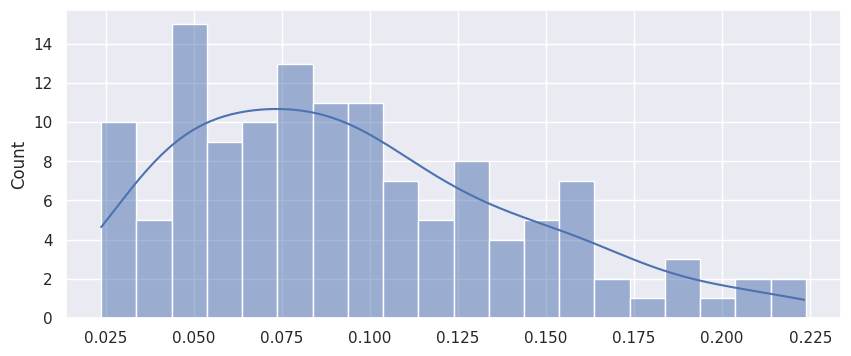

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(data[0], binwidth=0.01, kde=True, ax=ax)
fig.show()
# slightly right-skewed, min at 0.0237 and max at 0.2232

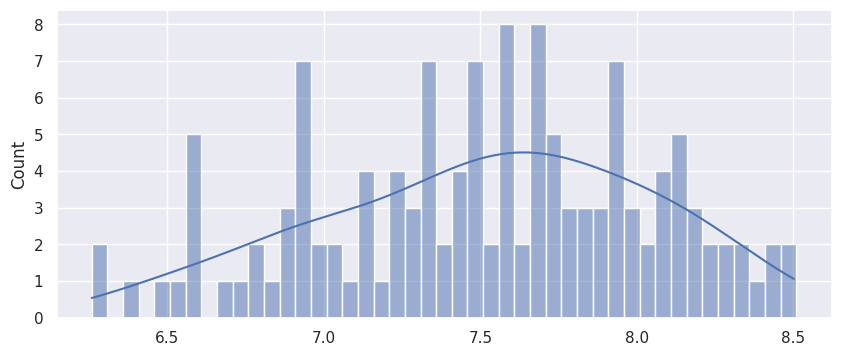

In [26]:
# log transformation
# NOTE: add constant to make results positive
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(10 + np.log(data[0]), binwidth=0.05, kde=True, ax=ax)
fig.show()
# after log tranform, close to normal
# NOTE: the right-skew shape now is becoming slightly left-skewed

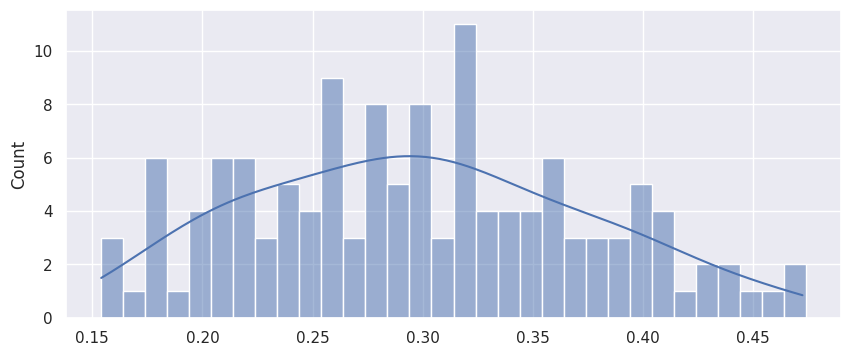

In [23]:
# sqare root transformation
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(np.sqrt(data[0]), binwidth=0.01, kde=True, ax=ax)
fig.show()
# after square root transform, the shape is closer to normal, different to log transform

> ECDF

> QQ-Plot

- https://www.kaggle.com/code/gadaadhaarigeek/q-q-plot

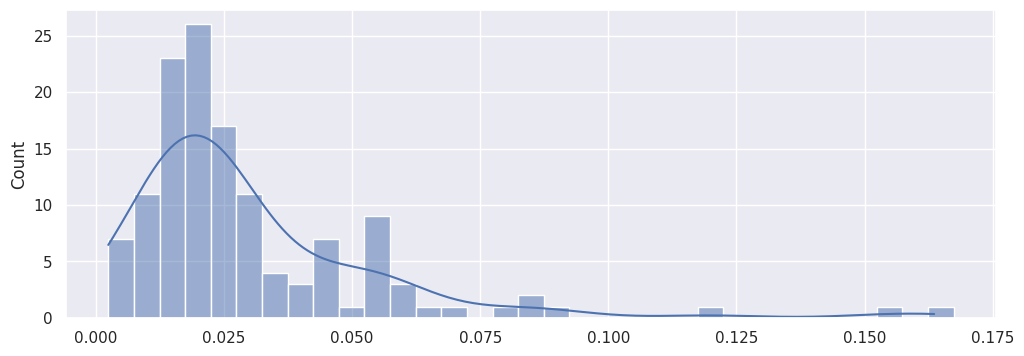

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.histplot(cr_0201, binwidth=0.005, kde=True, ax=ax)
fig.show()

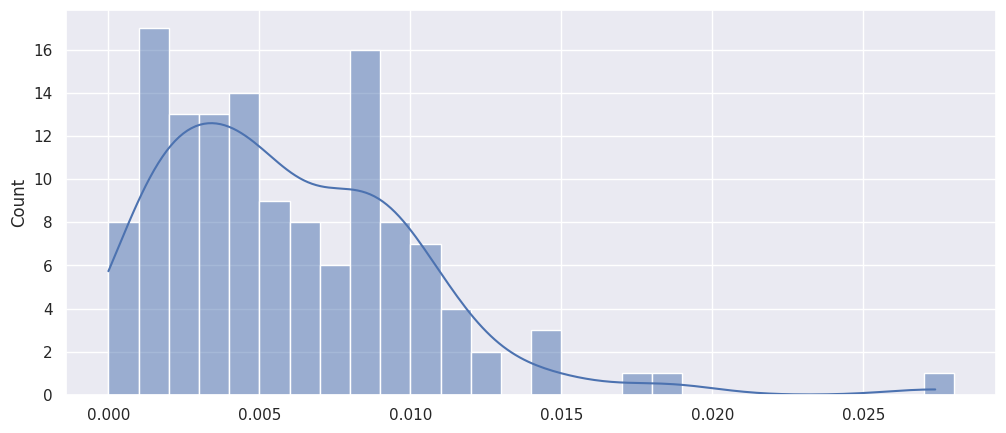

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(cr_0401, binwidth=0.001, kde=True, ax=ax)
fig.show()
# slightly bimodal? maybe because if could contain different types of data